In [4]:
import re
import ast
from collections import Counter
import json
from matplotlib import pyplot as plt
from connection import ConnectionTask
import redis
import time
from pprint import pprint
c=ConnectionTask()
%matplotlib inline

In [ ]:
with open("/root/logs/rest_sanic.log") as f:
    rest_data=f.read()

In [ ]:
query_list=[item.replace("data is ","") for item in re.findall("data is.*",rest_data)]
query_list[10]

In [ ]:
def data_counter(data,resp_data=None):
    if resp_data is None:
        resp_data=[]
    if isinstance(data,dict):
        for key,value in data.items():
            if "$" in key:
                resp_data=data_counter(value,resp_data)
            else:
                resp_data.append(key)
                resp_data=data_counter(value,resp_data)
    elif isinstance(data,list):
        for item in data:
            resp_data=data_counter(item,resp_data)
    
    return resp_data

In [ ]:
data=[]
for index,item in enumerate(query_list):
    item=ast.literal_eval(item)
    if item is None:
        continue
    query=item.get("query")
    if query is None:
        continue
#     print(query)
    data+=data_counter(query)
    print(index,end='\r')

In [ ]:
Counter(data).keys()

In [ ]:
ctrip_keys=['id','name','brandCode','cityCode','areaId','services','themes','images','descriptions','address','lat','lng','loc',
 'categoryCodes','lastUpdated','policies','refPoints','awards','tpa_Extensions','rooms','__v','price','ListPrice','phones']
draw_data={k:v for k,v in Counter(data).items() if k in ctrip_keys}
drawBar(draw_data)

In [ ]:
def drawBar(gradeGroup,xlabel='Grade',ylabel='Frequency',title='Grades Of Male Students'):
    xticks = list(gradeGroup.keys())#每个柱的下标说明
#     gradeGroup = {'A':200,'B':250,'C':330,'D':400,'E':500}#用于画图的频率数据
    
    #创建柱状图
    #第一个参数为柱的横坐标
    #第二个参数为柱的高度
    #参数align为柱的对齐方式，以第一个参数为参考标准
    plt.bar(range(len(xticks)), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center',yerr=0.000001)

    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    plt.xticks(range(len(xticks)), xticks)

    #设置横坐标的文字说明
    plt.xlabel(xlabel)
    #设置纵坐标的文字说明
    plt.ylabel(ylabel)
    #设置标题
    plt.title(title)
    #绘图
    plt.show()
    plt.close()

### 分析cancel.log 

In [ ]:
import ast
from connection import ConnectionTask
import redis
import json
import time
c=ConnectionTask()

In [ ]:
# with open('cancel.log') as f:
#     cancel_log=f.read()
# data={}
# for cancel in re.finditer("\['.*?\]",cancel_log):
#     app_code,order_id,user_id,coupon_id,_=ast.literal_eval(cancel.group())
#     mongo_data=c.pmdb.order_lite_list.find_one({'id':order_id},{'_id':0,
#                                                                 'completedAt':1,
#                                                                 'coupon':1,
#                                                                 'couponId':1,
#                                                                'createdAt':1})
#     if mongo_data.get('completedAt') or not coupon_id or app_code!='91ala':
#         continue
# #     print(app_code,order_id,user_id)
#     rrdb = redis.StrictRedis(host='rrdb.localdomain',port=16379,db=0,charset="UTF-8",decode_responses=True)
#     coupon_price=rrdb.execute_command('JGET', 'o:{}'.format(order_id), '/coupon/price')
# #     print(app_code,order_id,user_id,coupon_id,coupon_price)
# #     continue 
#     coupon_list_key = 'c:{}:{}'.format(app_code, user_id)
#     used_coupon_list_key = 'c:{}:{}:used'.format(app_code, user_id)
#     expire_coupon_list_key = 'c:{}:{}:expired'.format(app_code, user_id)

#     ardb = redis.StrictRedis(host='activityredis.localdomain',
#                                            port=6379,
#                                            db=0,
#                                            encoding='utf-8',
#                                            decode_responses=True)
#     date=time.strftime('%Y-%m-%d',time.localtime(mongo_data['createdAt']/1000))
#     for item, coupon_ts in ardb.zscan_iter(coupon_list_key, match='{}|*'.format(coupon_id)):
#         _, aid, paid = item.split('|')
#         print(order_id, coupon_id,aid, paid, coupon_price)
# #         rp = ardb.pipeline()
# #         rp.hincrby('a:' + aid, 'used', 1)
# #         rp.hincrbyfloat('a:' + aid, 'allowance', coupon_price)
# #         rp.hincrby('a:' + paid, 'used', 1)
# #         rp.hincrbyfloat('a:' + paid, 'remainingFunds', -coupon_price)
# #         rp.execute()

#     for item, coupon_ts in ardb.zscan_iter(used_coupon_list_key, match='{}|*'.format(coupon_id)):
#         _, aid, paid = item.split('|')
#         print(order_id, coupon_id,aid, paid, coupon_price)
# #         rp = ardb.pipeline()
# #         rp.hincrby('a:' + aid, 'used', 1)
# #         rp.hincrbyfloat('a:' + aid, 'allowance', coupon_price)
# #         rp.hincrby('a:' + paid, 'used', 1)
# #         rp.hincrbyfloat('a:' + paid, 'remainingFunds', -coupon_price)
# #         rp.execute()
    
#     for item, coupon_ts in ardb.zscan_iter(expire_coupon_list_key, match='{}|*'.format(coupon_id)):
#         _, aid, paid = item.split('|')
#         print(order_id, coupon_id,aid, paid, coupon_price)
# #         rp = ardb.pipeline()
# #         rp.hincrby('a:' + aid, 'used', 1)
# #         rp.hincrbyfloat('a:' + aid, 'allowance', coupon_price)
# #         rp.hincrby('a:' + paid, 'used', 1)
# #         rp.hincrbyfloat('a:' + paid, 'remainingFunds', -coupon_price)
# #         rp.execute()

#     data.setdefault(date,{})
#     data[date].setdefault(aid,{'totle':0,'price':0})
#     data[date][aid]['totle']+=1
#     data[date][aid]['price']+=coupon_price


In [ ]:
# with open('cancel.log') as f:
#     cancel_log=f.read()
# data={}
# for cancel in re.finditer("\[.*?'91ala'.*?\]",cancel_log):
#     line=cancel.group()
#     if line[-11:-7]=='None':
#         print(line[:11],line[-40:])
#         continue
#     data.setdefault(line[1:11],{})
#     app_code,order_id,user_id,coupon_id,_=ast.literal_eval(re.findall("\['91ala'.*?\]",line)[-1])
#     print(app_code,order_id,user_id)
#     break
#     data[line[1:11]].setdefault()
# #     print(line[1:11])
# #     print(cancel.group())
# #     break
# data

In [ ]:
# # 统计已完成订单的红包使用，做红包数据补偿
# with open('/data/logs/complete.log') as f:
#     complete_log=f.read()
# complete_data={}
# price_data={}
# for complete in re.finditer('\[.*91ala.*\]',complete_log):
#     line=complete.group()
#     date=line[1:11]
#     order=line.split(':')[-1]
# #     print(order)
#     app_code,order_id,user_id,coupon_id,_=ast.literal_eval(order[1:])
#     if not coupon_id:
#         continue
# #     print(date,app_code,order_id,user_id,coupon_id)
# #     break
    
    
#     ardb = redis.StrictRedis(host='activityredis.localdomain',port=6379,db=0,encoding='utf-8',decode_responses=True)
#     rrdb = redis.StrictRedis(host='rrdb.localdomain',port=16379,db=0,charset="UTF-8",decode_responses=True)
#     coupon_price=rrdb.execute_command('JGET', 'o:{}'.format(order_id), '/coupon/price')

#     used_coupon_list_key = 'c:{}:{}:used'.format(app_code, user_id)
#     for item, coupon_ts in ardb.zscan_iter(used_coupon_list_key, match='{}|*'.format(coupon_id)):
#         _, aid, paid = item.split('|')
# #         print(aid,paid)
#         complete_data.setdefault(aid,{})
#         complete_data[aid].setdefault(paid,{})
# #         complete_data[aid].setdefault('price',coupon_price)
#         complete_data[aid][paid].setdefault(date,0)
#         complete_data[aid][paid][date]+=1
#         price_data.setdefault(aid,{})
#         price_data[aid].setdefault(paid,coupon_price)
# pprint(complete_data)
# pprint(price_data)

In [ ]:
# # 补偿至mongo and redis
# from connection import ConnectionTask
# c=ConnectionTask()
# for coupon_activity_id in complete_data:
#     for activity_id,value in complete_data[coupon_activity_id].items():
#         totle=0
#         price=price_data[coupon_activity_id][activity_id]
#         for date,count in value.items():
#             totle+=count
#             c.pmdb.activity.update_one({
#                 'target':'coupon','appCode':'91ala',
#                 'couponActivityId':coupon_activity_id,
#                 'activityId':activity_id,
#                 'date':date},
#             {
#                 '$set':{
#                     'usedToday':count,
#                     'allowanceToday':price*count
#                 },
#                 '$inc':{
#                     'used':totle,
#                     'allowance':price*totle
#                 }
#             })
#             print(coupon_activity_id,activity_id,date,count,totle,price)

In [ ]:
# # 补偿至mongo and redis
# from connection import ConnectionTask
# c=ConnectionTask()
# for coupon_activity_id in complete_data:
#     for activity_id,value in complete_data[coupon_activity_id].items():
#         price=price_data[coupon_activity_id][activity_id]
#         for date,count in value.items():
#             print(coupon_activity_id,activity_id,count,price,price*count)
#             rp = ardb.pipeline()
#             rp.hincrby('a:' + coupon_activity_id, 'used', count)
#             rp.hincrby('a:' + activity_id, 'used', count)
#             rp.hincrbyfloat('a:' + coupon_activity_id, 'allowance', price*count)
#             rp.hincrbyfloat('a:' + activity_id, 'remainingFunds', -price*count)
#             rp.execute()

In [ ]:
with open('/data/logs/sync_status.log') as f:
    sync_status_log=f.read()

In [ ]:
data=[]
for item in re.finditer('\'\[\[\{\"orderId\"\:.*?\}\]\'',sync_status_log):
    resp=json.loads(ast.literal_eval(item.group()))
    data.append(resp[0])


In [ ]:
len(data)

In [ ]:
# 携程城市分等级。更新 redis.ctrip_map:city

from connection import ConnectionTask
c=ConnectionTask()
with open('/data/ctrip/ctrip_city.json') as f:
    data=json.load(f)

city_list_0='''北京市、上海市、广州市、深圳市'''.split('、')
city_list_1='''成都市、杭州市、武汉市、重庆市、南京市、天津市、苏州市、西安市、长沙市、沈阳市、青岛市、郑州市、大连市、东莞市、宁波市'''.split('、')
city_list_2='''厦门市、福州市、无锡市、合肥市、昆明市、哈尔滨市、济南市、佛山市、长春市、温州市、石家庄市、南宁市、常州市、泉州市、南昌市、贵阳市、太原市、烟台市、嘉兴市、南通市、金华市、珠海市、惠州市、徐州市、海口市、乌鲁木齐市、绍兴市、中山市、台州市、兰州市'''.split('、')
city_list_3='''潍坊市、保定市、镇江市、扬州市、桂林市、唐山市、三亚市、眉山市、湖州市、呼和浩特市、廊坊市、洛阳市、威海市、盐城市、临沂市、江门市、汕头市、泰州市、漳州市、邯郸市、济宁市、芜湖市、淄博市、银川市、柳州市、绵阳市、湛江市、鞍山市、赣州市、大庆市、宜昌市、包头市、咸阳市、秦皇岛市、株洲市、莆田市、吉林市、淮安市、肇庆市、宁德市、衡阳市、南平市、连云港市、丹东市、丽江市、揭阳市、延边朝鲜族自治州、舟山市、九江市、龙岩市、沧州市、抚顺市、襄阳市、上饶市、营口市、三明市、蚌埠市、丽水市、岳阳市、清远市、荆州市、泰安市、衢州市、盘锦市、东营市、南阳市、马鞍山市、南充市、西宁市、孝感市、齐齐哈尔市'''.split('、')
city_list_4='''乐山市、湘潭市、遵义市、宿迁市、新乡市、信阳市、滁州市、锦州市、潮州市、黄冈市、开封市、德阳市、德州市、梅州市、鄂尔多斯市、邢台市、茂名市、大理白族自治州、韶关市、商丘市、安庆市、黄石市、六安市、玉林市、宜春市、北海市、牡丹江市、张家口市、梧州市、日照市、咸宁市、常德市、佳木斯市、红河哈尼族彝族自治州、黔东南苗族侗族自治州、阳江市、晋中市、渭南市、呼伦贝尔市、恩施土家族苗族自治州、河源市、郴州市、阜阳市、聊城市、大同市、宝鸡市、许昌市、赤峰市、运城市、安阳市、临汾市、宣城市、曲靖市、西双版纳傣族自治州、邵阳市、葫芦岛市、平顶山市、辽阳市、菏泽市、本溪市、驻马店市、汕尾市、焦作市、黄山市、怀化市、四平市、榆林市、十堰市、宜宾市、滨州市、抚州市、淮南市、周口市、黔南布依族苗族自治州、泸州市、玉溪市、通化市、宿州市、枣庄市、内江市、遂宁市、吉安市、通辽市、景德镇市、阜新市、雅安市、铁岭市、承德市、娄底市'''.split('、')
city_list_5='''克拉玛依市、长治市、永州市、绥化市、巴音郭楞蒙古自治州、拉萨市、云浮市、益阳市、百色市、资阳市、荆门市、松原市、凉山彝族自治州、达州市、伊犁哈萨克自治州、广安市、自贡市、汉中市、朝阳市、漯河市、钦州市、贵港市、安顺市、鄂州市、广元市、河池市、鹰潭市、乌兰察布市、铜陵市、昌吉回族自治州、衡水市、黔西南布依族苗族自治州、濮阳市、锡林郭勒盟、巴彦淖尔市、鸡西市、贺州市、防城港市、兴安盟、白山市、三门峡市、忻州市、双鸭山市、楚雄彝族自治州、新余市、来宾市、淮北市、亳州市、湘西土家族苗族自治州、吕梁市、攀枝花市、晋城市、延安市、毕节市、张家界市、酒泉市、崇左市、萍乡市、乌海市、伊春市、六盘水市、随州市、德宏傣族景颇族自治州、池州市、黑河市、哈密市、文山壮族苗族自治州、阿坝藏族羌族自治州、天水市、辽源市、张掖市、铜仁市、鹤壁市、儋州市、保山市、安康市、白城市、巴中市、普洱市、鹤岗市、莱芜市、阳泉市、甘孜藏族自治州、嘉峪关市、白银市、临沧市、商洛市、阿克苏地区、海西蒙古族藏族自治州、大兴安岭地区、七台河市、朔州市、铜川市、定西市、迪庆藏族自治州、日喀则市、庆阳市、昭通市、喀什地区、怒江傈僳族自治州、海东市、阿勒泰地区、平凉市、石嘴山市、武威市、阿拉善盟、塔城地区、林芝市、金昌市、吴忠市、中卫市、陇南市、山南市、吐鲁番市、博尔塔拉蒙古自治州、临夏回族自治州、固原市、甘南藏族自治州、昌都市、阿里地区、海南藏族自治州、和田地区、克孜勒苏柯尔克孜自治州、海北藏族自治州、那曲地区、玉树藏族自治州、黄南藏族自治州、果洛藏族自治州、三沙市'''.split('、')
city_list={'0':city_list_0,'1':city_list_1,'2':city_list_2,'3':city_list_3,'4':city_list_4,'5':city_list_5,}
city_data={}
count=0
for score in city_list:
    for city in city_list[score]:
        count+=1
        canvalue=False
        city=city.replace('市','')
        for item in data:
            if item['CityName']==city:
                city_data[item['CityName']]=item['CityCode']
                canvalue=True
                c.srdb_new(0).zadd('ctrip_map:city',int(score),item['CityCode'])
                break
        if not canvalue:
            for item in data:
                if item['CityName']==city[:len(item['CityName'])]:
                    city_data[item['CityName']]=item['CityCode']
                    c.srdb_new(0).zadd('ctrip_map:city',int(score),item['CityCode'])
                    canvalue=True
        if not canvalue:
            print(city,'not found')
city=city_data.keys()
for item in data:
    if item['CityName'] in city:
        continue
    count+=1
    c.srdb_new(0).zadd('ctrip_map:city',int(6),item['CityCode'])
    print(count,end='\r')#3449

In [ ]:
c.srdb_new(0).zscore('ctrip_city_map','4')

In [ ]:
count=0
for city_type in range(0,8):
    for city_code in c.drdb_new(0).zrangebyscore('ctrip_city_map',city_type,city_type):
        if city_type in [0,1,2]:
            database = 'jiudian_hotels_{}'.format(city_code)   
            database_create_index(database)
            count+=1
        else:
            database = 'jiudian_hotels_{}t'.format(city_type)
            database_create_index(database)
            count+=1
            break
count

In [ ]:
{'location':1,
                                         "id":1,
                                         "cityCode":1,
                                         "price":1,
                                         "brandCode":1,
                                         "zoneCode":1, 
                                         "starRate":1,
                                         "areaId":1,
                                         "starLicence":1,
                                         "userRate":1,
                                         "amentities":1,
                                         "services":1,
                                         "themes":1,
                                         "tag":1,}.keys()

In [ ]:
# jiudian_hotels_sort
mdb_ctrip=c.static_ctrip
database_create_index('jiudian_hotels_sort',mdb_ctrip)
for table in mdb_ctrip.collection_names():
    if table in ['jiudian_hotels_sort', 'system.indexes']:
        continue
    mdata=list(mdb_ctrip[table].find({},{'location':1,
                                         "id":1,
                                         "cityCode":1,
                                         "price":1,
                                         "brandCode":1,
                                         "zoneCode":1, 
                                         "starRate":1,
                                         "areaId":1,
                                         "starLicence":1,
                                         "userRate":1,
                                         "amentities":1,
                                         "services":1,
                                         "themes":1,
                                         "tag":1,
                                         "_id":0,
                                        }))
    for data in mdata:
        try:
            mdb_ctrip.jiudian_hotels_sort.insert_one(data)
        except:
            continue
    print(table,'ok')

In [ ]:
# 酒店创建索引+表
from pymongo import IndexModel,MongoClient
def database_create_index(database,ctrip):
    index=[]
    index.append(IndexModel([("location", "2dsphere")], name="location_2dsphere"))
    index.append(IndexModel([("id" , 1)], name="id_1", unique=True))
    if 't' in database:
        index.append(IndexModel([("cityCode" , 1)], name="cityCode_1"))
    index.append(IndexModel([("price" , 1)], name="price_1"))
    index.append(IndexModel([("brandCode" , 1)], name="brandCode_1"))
    index.append(IndexModel([("zoneCode" , 1)], name="zoneCode_1"))
    index.append(IndexModel([("starRate" , -1)], name="starRate_-1"))
    index.append(IndexModel([("areaId" , 1)], name="areaId_1"))
    index.append(IndexModel([("starLicence" , -1)], name="starLicence_-1"))
    index.append(IndexModel([("userRate" , -1)], name="userRate_-1"))
    index.append(IndexModel([("amentities" , 1)], name="amentities_1"))
    index.append(IndexModel([("services" , 1)], name="services_1"))
    index.append(IndexModel([("themes" , 1)], name="themes_1"))
    index.append(IndexModel([("tag" , 1)], name="tag_1"))
    ctrip[database].create_indexes(index)

In [ ]:
database='jiudian_hotels_1'
mongo_data = c.static['jiudian_hotels'].find_one({'id': '972111'}, {'_id': 0})
mongo_data['location']={"type" : "Point","coordinates" : mongo_data.pop('loc')}
mongo_data['userRate']=mongo_data.get('awards',{}).get('CtripUserRate','')
amentities=set()
for room in mongo_data.get('rooms',[]):
    if ('amentities' not in room) or (not room.get('amentities',[])):
        continue
    for ament in room.get('amentities',[]):
        if 'RoomAmenityCode' not in ament:
            continue
        amentities.add(ament['RoomAmenityCode'])
mongo_data['amentities']=list(amentities)

zoneCode=set()
address=mongo_data.get('address',{}).get('Zone',[])
if isinstance(address,dict):
    address=[address]
for zone in address:
    if 'ZoneCode' not in zone:
        continue
    zoneCode.add(zone.get('ZoneCode',''))
mongo_data['zoneCode']=list(zoneCode)

mongo_data['starRate']=mongo_data.get('awards',{}).get('HotelStarRate','')
mongo_data['starLicence']=mongo_data.get('awards',{}).get('HotelStarLicence','')
# pprint(mongo_data)
# self.static_ctrip[database].update_one({'id': mongo_data.pop('id')}, {'$set': mongo_data}, upsert=True)
ctrip[database].insert_one(mongo_data)

In [ ]:
# # static数据库增加索引
# index=[]
# # index.append(IndexModel([("loc", "2d")], name="loc_2d"))
# # index.append(IndexModel([("id" , 1)], name="id_1", unique=True))
# # if 't' in database:
# #     index.append(IndexModel([("cityCode" , 1)], name="cityCode_1"))
# # index.append(IndexModel([("price" , 1)], name="price_1"))
# # index.append(IndexModel([("brandCode" , 1)], name="brandCode_1"))
# index.append(IndexModel([("zoneCode" , 1)], name="zoneCode_1"))
# index.append(IndexModel([("starRate" , -1)], name="starRate_-1"))
# # index.append(IndexModel([("areaId" , 1)], name="areaId_1"))
# index.append(IndexModel([("starLicence" , -1)], name="starLicence_-1"))
# index.append(IndexModel([("amentities" , 1)], name="amentities_1"))
# index.append(IndexModel([("services" , 1)], name="services_1"))
# index.append(IndexModel([("themes" , 1)], name="themes_1"))
# c.static['jiudian_hotels'].create_indexes(index)

In [ ]:
# # 删除loc索引，新建location索引
# for table in c.dmdb_ctrip.collection_names():
#     c.dmdb_ctrip[table].drop_index('loc_2d')
#     index=[]
#     index.append(IndexModel([("location", "2dsphere")], name='location_2dsphere'))
#     c.dmdb_ctrip[table].create_indexes(index)
#     print(table)

In [ ]:
# 基于loc新曾location字段
count=0
for table in c.dmdb_ctrip.collection_names():
    for item in c.dmdb_ctrip[table].find({},{'id':1,'loc':1,'awards':1},no_cursor_timeout=True):
        c.dmdb_ctrip[table].update_one({'id':item['id']},
                                       {'$set':{'location':{
                                                    "type" : "Point",
                                                    "coordinates" : item['loc']},
                                               'userRate':item.get('awards',{}).get('CtripUserRate','')}}
                                      )
        count+=1
        print('{}:{}:{}'.format(table,item['id'],count),end='\r')

In [ ]:

# city_dict={it['Id']:it['Name'] for item in city_json for it in item['Districts']}
# pprint(city_dict)
len(c.srdb_new(0).hgetall('ctrip_area_map')) # old count is 1100

In [ ]:
# 更新ctrip_area_map 对应关系。基于/data/ctrip/city.json and district.json 
with open('/data/ctrip/city.json') as f:
    city_json=json.load(f)
with open('/data/ctrip/district.json') as f:
    district_json=json.load(f)  

district_data={it['Id']:it['Name'] for item in city_json for it in item['Districts']}

count=0
for item in district_json:
    if item['Location'] in district_data:
        count+=1
        if item['LocationName'] != district_data[item['Location']]:
            print('err',item,district_data[item['Location']])
            continue
    district_data[item['Location']] = item['LocationName']
print(count)
c.srdb_new(0).hmset('ctrip_map:district',district_data)

In [ ]:
c.srdb_new(0).hmget('ctrip_map:district',['123456','123'])

In [ ]:
# 更新ctrip_map:brand 对应关系。
# with open('/data/ctrip/brands.json') as f:
#     brands_json=json.load(f)
with open('/data/ctrip/hotelBrandCode.json') as f:
    hotel_brand_json=json.load(f)
c.srdb_new(0).hmset('ctrip_map:brand',{value:key for key,value in hotel_brand_json.items()})

In [ ]:
# 更新ctrip_business_zone_map 对应关系。
with open('/data/ctrip/business_zone.json') as f:
    business_zone_json=json.load(f)

count=0
for business_zone in business_zone_json:
    zone_id,zone_name,city_id=business_zone['Zone'],business_zone['ZoneName'],business_zone['City']
#     print(zone_id,zone_name,city_id,business_zone)
    c.srdb_new(0).hset('ctrip_map:zone',zone_id,zone_name)
    count+=1
    print(count,end='\r')

In [ ]:
len(business_zone_json)

In [ ]:
# 基于城区push tag字段
city_dict={it['Id']:it['Name'] for item in city_json for it in item['Districts']}
# pprint(city_dict)
c.srdb_new(0).hmset('ctrip_area_map',city_dict)

In [ ]:
c.srdb_new(0).hget('ctrip_area_map','40')

In [ ]:
count=0
for table in c.static_ctrip.collection_names():
    if table in ['jiudian_hotels_sort', 'system.indexes']:
        continue
# for table in ['jiudian_hotels_2']:
    for item in c.static_ctrip[table].find({},{'id':1,'areaId':1,'tag':1,'_id':0}):
        count+=1
        print('  {}:{}:{}  '.format(item.get('id'),table,count),end='\r')
        area=c.srdb_new(0).hget('ctrip_area_map',item.get('areaId'))
        if area and (area not in item.get('tag',[])):
#             print(area,end=',')
            c.static_ctrip[table].update_one({'id':item['id']},{'$push':{'tag':area}})
#             print(item['id'],item.get('areaId'),item['tag'],area)
#             break


In [ ]:
count

# jiudian_hotels.tag 关键字


In [ ]:
# 酒店主题
with open('/data/brands.json') as f:
    brands_read=f.read()
brands_json=ast.literal_eval(brands_read.replace('（','(').replace('）',')'))
brands_dict={item['BrandId']:[v.lower() for v in item['ShortName'].replace(')','').split('(')] for item in brands_json}

In [ ]:
# 酒店城区
with open('/data/ctrip_city.json') as f:
    city_json=json.load(f)
city_dict={it['Id']:it['Name'][:-1] if it['Name'][-1] in ['区','县'] else it['Name'] for item in city_json for it in item['Districts']}

In [ ]:
city_new=[]
city_code_list=c.static.jiudian_hotels.distinct('cityCode')
total=len(city_code_list)
count=0
for city in city_json:
    if city['CityCode'] in city_code_list:
        count+=1
        brand_code_list=c.static.jiudian_hotels.distinct('brandCode',{'cityCode':city['CityCode']})
        city['HotelBrandCode']=[{'id':item['BrandId'],'name':item['ShortName']} for item in brands_json if item['BrandId'] in brand_code_list]
        city_new.append(city)
        print('{}:{}'.format(count,total),end='\r')

In [ ]:
with open('/root/notebook/stg/ctrip_geo.json','w') as f:
    f.write(json.dumps(city_new,indent=2,ensure_ascii=False))

In [ ]:
# 酒店商圈
with open('/data/business_zone.json') as f:
    zone_json=json.load(f)
zone_dict={item['Zone']:item['ZoneName'].replace('/',' ') for item in zone_json}

In [ ]:
from bosonnlp import BosonNLP
nlp = BosonNLP('vpbQoiUw.17601.vIb8vND-oYcW')
def contents_tag_fetch(contents):
    resp=nlp.tag(contents,oov_level=4)
    if (not resp) or (not resp[0]) or (not resp[0].get('word')):
        return set()
    word=resp[0]['word']
    if not isinstance(word,list):
        word=[word]
    main_word=[item for item in word if (item not in ['酒店','客栈','宾馆','（','）',' ']) and len(item)>1]
    return set(main_word)
# contents_tag_fetch('希尔顿欢朋酒店、marriott executive apartment')

In [ ]:
from bosonnlp import BosonNLP
nlp = BosonNLP('vpbQoiUw.17601.vIb8vND-oYcW')
nlp.tag('[None,"家景区"]',oov_level=4)

In [ ]:
count=0
err_count=0
for item in c.static['jiudian_hotels'].find({'tag':{'$exists':False}},
                                            {'_id':0,'name':1,'id':1,'brandCode':1,'areaId':1,'zoneCode':1},
                                            no_cursor_timeout=True):
    try:
        name=item['name']
        brand=' '.join(brands_dict.get(item.get('brandCode',''),[]))
        area=city_dict.get(item.get('areaId'),'')
        zone=' '.join([zone_dict.get(zone_code,' ') for zone_code in item.get('zoneCode',[])])
        content=' '.join([name,brand,zone])
        if not area or not zone:
            err_count+=1
        count+=1
        tag=contents_tag_fetch(content)
        
        tag.add(area) if area else 0
        tag.add(brand) if brand else 0
        tag.add(zone) if zone else 0
        for i in range(3,len(name)):
            tag.add(name[:i])
        
        c.static['jiudian_hotels'].update_one({'id':item['id']},{'$set':{'tag':list(tag)}})
        print('{}/{}'.format(err_count,count),end='\r')
    except Exception as e:
        print('err',item,zone,e)
#         break
#     print(item['id'],content,'+',area,'+',tag)
#     break
#     if count==100:
#         break
c.static['jiudian_hotels'].find({},
                                {'_id':0,'name':1,'id':1,'brandCode':1,'areaId':1,'zoneCode':1},
                                no_cursor_timeout=True).close()
print(count,err_count)

In [ ]:
tag=[]
count=0
for item in c.static['jiudian_hotels'].find({},{'_id':0,'tag':1},no_cursor_timeout=True):
    tag.extend(item['tag'])
    count+=1
    print(count,end='\r')

In [ ]:
# from collections import Counter
# tagter=Counter(tag)
# print(tagter)

In [ ]:
# 统计2017-09-04 21:30-23:50的未更新状态成功的订单
start_time=time.mktime((2017,9,4,21,20,0,0,0,0))*1000
end_time=time.mktime((2017,9,4,23,50,0,0,0,0))*1000
for item in c.pmdb.order_lite_list.find({'createdAt':{'$gte':start_time,'$lt':end_time},
                                        'status':{'$in':[2]}},sort=[('createdAt',1)]):
    order_data=c.pmdb['order_{}'.format(item['orderType'])].find_one({'id':item['id']})
    if not order_data.get('paymentSerial'):
        print('>>>>>>',order_data['id'],order_data['partnerId'],order_data['orderType'])
        continue
    pay_status=c.prdb_paym(1).hget('p:{}:{}'.format(order_data['appCode'],order_data['paymentSerial']),'status')
    if pay_status in ['2',2]:
        print('>>',order_data['id'],order_data['orderType'],pay_status,order_data['timeline'])
#     break

In [ ]:
hotel_id='972111'
mongo_data = c.static['jiudian_hotels'].find_one({'id': hotel_id}, {'_id': 0})
city_code = mongo_data['cityCode']
city_type = c.srdb_new(0).zscore('ctrip_city_map', city_code)
database = 'jiudian_hotels_{}'.format(city_code) if city_type in [0, 1, 2] else 'jiudian_hotels_{}t'.format(city_type)

# self.static_ctrip[database].update_one({'id': mongo_data.pop('id')}, {'$set': mongo_data}, upsert=True)
# self.static_ctrip[database].insert_one(mongo_data)
print([city_type, city_code, database, hotel_id])

In [ ]:
# 基于mongo统计ele外卖失败订单原因
import tablib,time

start=time.mktime((2017,11,1,0,0,0,0,0,0))*1000
end=time.mktime((2017,11,16,0,0,0,0,0,0))*1000
counter={}
for item in c.pmdb.order_waimai.find({'createdAt':{'$gte':start,'$lt':end},'status':{'$nin':[1,2,3,4]}},{'id':1,'timeline':1,'_id':0}):
    for time_line in item.get('timeline',[]):
        if '订单失败' in time_line and '支付超时' not in time_line:
            date,*args,reason=time_line.strip(' ').split(' ',3)
            if len(reason)<=2:
                print(time_line,reason)
            counter.setdefault(date,{})
            counter[date].setdefault(reason,0)
            counter[date][reason]+=1
            break

tab_data=tablib.Dataset(headers=['时间','原因','单数'])
for key,value in counter.items():
    for k,v in value.items():
        tab_data.append([key,k,v])

with open('waimai_refund_order_counter_{}-{}.xls'.format(
    time.strftime('%Y%m%d',time.localtime(start/1000)),
    time.strftime('%Y%m%d',time.localtime(end/1000))),'wb') as f:
    f.write(tab_data.xls)

In [9]:
for i in ('session.log{}'.format('.'+str(i) if i else "") for i in range(10)):
    print(i)

session.log
session.log.1
session.log.2
session.log.3
session.log.4
session.log.5
session.log.6
session.log.7
session.log.8
session.log.9


In [11]:
# 基于session.log统计ele外卖失败订单原因
import os
import tablib,time
clean_data=[]
order_set=set()
data_counter={}
for prot in ['22310','10022','22319']:
    for log_name in ('session.log{}'.format('.'+str(i) if i else "") for i in range(10)):
        os.system('scp -P {} root@139.198.1.168:/root/logs/{} /data/logs/'.format(prot,log_name))
        with open('/data/logs/{}'.format(log_name)) as f:
            session_log=f.read()
        _clean_data,_order_set=log_parse_data(
            [],
            set(),
            session_log,
            ['2017-12-15','2017-12-16','2017-12-17'])
        print(prot,log_name,len(_clean_data),len(_order_set))
        if len(_order_set) == 0:
            break
        clean_data.extend(_clean_data)
        order_set.update(_order_set)

for item in clean_data:
    data_counter.setdefault(item.get('description'),0)
    data_counter[item.get('description')]+=1

data=tablib.Dataset(headers=['取消原因描述','单数'])
for key,value in data_counter.items():
    data.append([key,value
    ])
with open('waimai_refund_order_counter.xlsx', 'wb') as f:
    f.write(data.xlsx)

22310 session.log 41 41
22310 session.log.1 141 141
22310 session.log.2 135 135
22310 session.log.3 0 0
10022 session.log 87 87
10022 session.log.1 171 171
10022 session.log.2 70 70
10022 session.log.3 0 0
22319 session.log 62 62
22319 session.log.1 141 141
22319 session.log.2 116 116
22319 session.log.3 0 0
{'商家超时未接单:商家超时未接单': 116, '用户要求取消:商户取消订单': 23, None: 498, '用户退单:未知原因': 119, '双方协商一致取消订单:客服强制无效': 17, '用户要求取消:餐厅暂时无法提供服务': 2, '配送出现问题:你电话打不通，位置不确定，不敢送，要不你给个电话过来': 2, '暂时无法配送:配送人手不足，无法提供配送。': 62, '商家已经打烊:不好意思': 1, '商品已经售完:商户取消订单': 19, '商家已经打烊:商户取消订单': 7, '配送出现问题:配送异常': 9, '用户要求取消:请联系商家': 1, '超出配送范围:商户取消订单': 6, '配送出现问题:骑手拿错单': 1, '双方协商一致取消订单:双方协商好退单': 1, '配送出现问题:商户取消订单': 9, '商家现在太忙:商户取消订单': 10, '双方协商一致取消订单:协商一致': 2, '用户信息错误:抱歉饭需要等': 1, '双方协商一致取消订单:\n双方协商一致取消订单': 1, '双方协商一致取消订单:商家出餐时间过长': 1, '其他原因:客人原因(客人改变主意:客人来电申请取消订单，点错了餐，要求取消)': 1, '双方协商一致取消订单:商家同意': 4, '双方协商一致取消订单:餐厅同意，客服操作。': 1, '用户信息错误:他不要了': 1, '双方协商一致取消订单:商家同意退单': 2, '双方协商一致取消订单:商家同意取消 ': 2, '双方协商一致取消订单:商家同意取消': 3, '联系不上用户:商户取消

In [20]:
data=tablib.Dataset(headers=['取消原因描述','单数'])
for key,value in data_counter.items():
    data.append([
        key,value
    ])
with open('waimai_refund_order_counter.xlsx', 'wb') as f:
    f.write(data.xlsx)

In [24]:
def log_parse_data(clean_data,order_set,session_log,find_date):
    """
    :params find_data: ["2017-11-13", "2017-11-14"]
    """
    for date in find_date:
        for item in re.findall("{}.*'new_status': '-1'.*".format(date),session_log):
            item=ast.literal_eval(item.split('l-113: ')[-1])
            if item['eleme_order_id'] in order_set:
                continue
            try:
                extra=ast.literal_eval(item.pop('extra'))
                if not extra:
                    continue
                item.update(extra)
                clean_data.append(item)
                order_set.add(item['eleme_order_id'])
            except:
                pass
            
    return clean_data,order_set

In [23]:
d={}
d.pop('a',None)

In [ ]:
# 导出下 百联生活 11.10-11.16日的取消订单上一个订单状态
import tablib,time

start=time.mktime((2017,11,10,0,0,0,0,0,0))*1000
end=time.mktime((2017,11,16,24,0,0,0,0,0))*1000
counter={}
for item in c.pmdb.order_lite_list.find(
    {
        'createdAt':{'$gte':start,'$lt':end},
        'status':{'$in':[8]},
        'appCode':'oklife'
    },
    {'id':1,'orderType':1,'_id':0}):
    item=c.pmdb['order_{}'.format(item['orderType'])].find_one({'id':item['id']},{'id':1,'timeline':1,'_id':0})

    for index,time_line in enumerate(item.get('timeline',[])):
        if '已取消' in time_line:
            time_line=item.get('timeline',[])[index-1]
            date,*args,reason=time_line.strip(' ').split(' ',3)
            if len(reason)<=2:
                print(time_line,reason)
            counter.setdefault(date,{})
            counter[date].setdefault(reason,0)
            counter[date][reason]+=1
            break

tab_data=tablib.Dataset(headers=['时间','取消的上一个状态','单数'])
for key,value in counter.items():
    for k,v in value.items():
        tab_data.append([key,k,v])

with open('oklife_cancel_order_counter_{}-{}.xls'.format(
    time.strftime('%Y%m%d',time.localtime(start/1000)),
    time.strftime('%Y%m%d',time.localtime(end/1000))),'wb') as f:
    f.write(tab_data.xls)

In [6]:
mdb=c.pmdb

In [ ]:
import time
counter={}
for i in range(1,9):
    for j in range(14):
        start=time.mktime((2017,12,i,j,0,0,0,0,0))*1000
        end=time.mktime((2017,12,i,j+1,0,0,0,0,0))*1000
        data=mdb.order_waimai.find({'createdAt':{'$gte':start,'$lt':end},'status':8,'appCode':'bestpay'})
        counter.setdefault('{}'.format(i),0)
        counter['{}'.format(i)]+=data.count()
drawBar(counter,xlabel='12-01 to 12-08',ylabel='number of order',title="0 to 14 o'clock daily cancel orders")

In [ ]:
counter={}
for i in range(1,9):
    for j in range(16):
        start=time.mktime((2017,12,i,j,0,0,0,0,0))*1000
        end=time.mktime((2017,12,i,j+1,0,0,0,0,0))*1000
        data=mdb.order_waimai.find({'createdAt':{'$gte':start,'$lt':end},'status':4,'appCode':'bestpay'})
        counter.setdefault('{}'.format(i),0)
        counter['{}'.format(i)]+=data.count()
drawBar(counter,xlabel='12-01 to 12-08',ylabel='number of order',title="0 to 14 o'clock daily complete orders")

In [ ]:
counter={}
for i in range(1,9):
    for j in range(13):
        start=time.mktime((2017,12,i,j,0,0,0,0,0))*1000
        end=time.mktime((2017,12,i,j+1,0,0,0,0,0))*1000
        data=mdb.order_waimai.find({'createdAt':{'$gte':start,'$lt':end},'appCode':'bestpay'})
        counter.setdefault('{}'.format(i),0)
        counter['{}'.format(i)]+=data.count()
drawBar(counter,xlabel='12-01 to 12-08',ylabel='number of order',title="daily orders")

In [1]:
while True:
    date=time.strftime("%Y%m%d")
    start=time.mktime(time.strptime(date,"%Y%m%d"))*1000
    end=time.time()*1000
    count=mdb.order_waimai.find({
        'createdAt':{'$gte':start,'$lt':end},
        'appCode':'bestpay',
        'timeline_new.status':'已支付'}).count()
    data_sum=mdb.order_waimai.find({
        'createdAt':{'$gte':start,'$lt':end},
        'appCode':'bestpay'}).count()
    print(int(time.time()),count,data_sum,'{}%'.format(round(count/data_sum*100,2)),end='\r')
    time.sleep(5)

NameError: name 'time' is not defined

In [ ]:
def drawBar(gradeGroup,xlabel='Grade',ylabel='Frequency',title='Grades Of Male Students'):
    xticks = list(gradeGroup.keys())#每个柱的下标说明
#     gradeGroup = {'A':200,'B':250,'C':330,'D':400,'E':500}#用于画图的频率数据
    
    #创建柱状图
    #第一个参数为柱的横坐标
    #第二个参数为柱的高度
    #参数align为柱的对齐方式，以第一个参数为参考标准
    plt.bar(range(len(xticks)), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center',yerr=0.000001)

    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    plt.xticks(range(len(xticks)), xticks)

    #设置横坐标的文字说明
    plt.xlabel(xlabel)
    #设置纵坐标的文字说明
    plt.ylabel(ylabel)
    #设置标题
    plt.title(title)
    #绘图
    plt.show()
    plt.

<IPython.core.display.Javascript object>


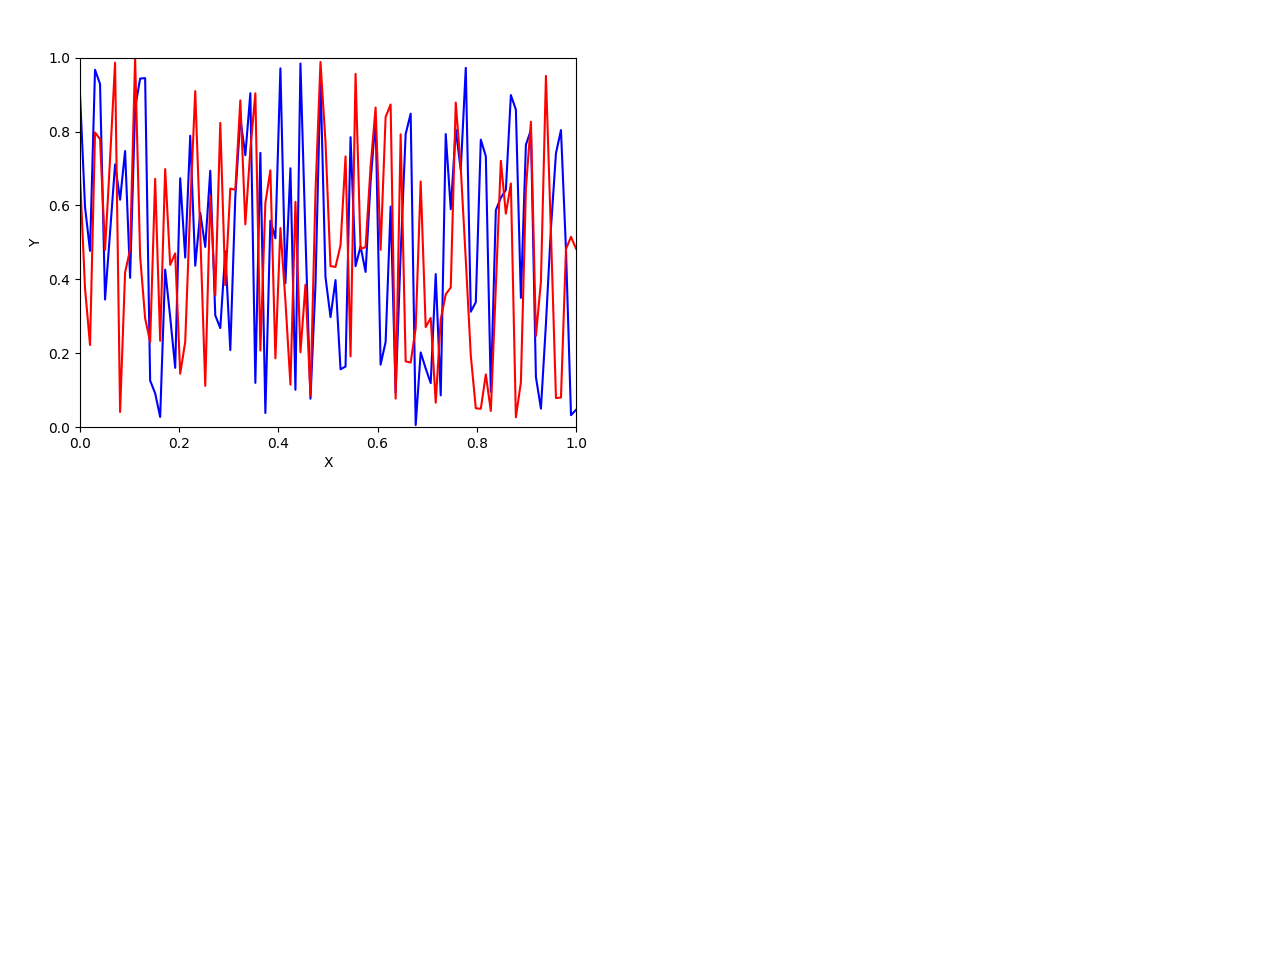

<IPython.core.display.Javascript object>


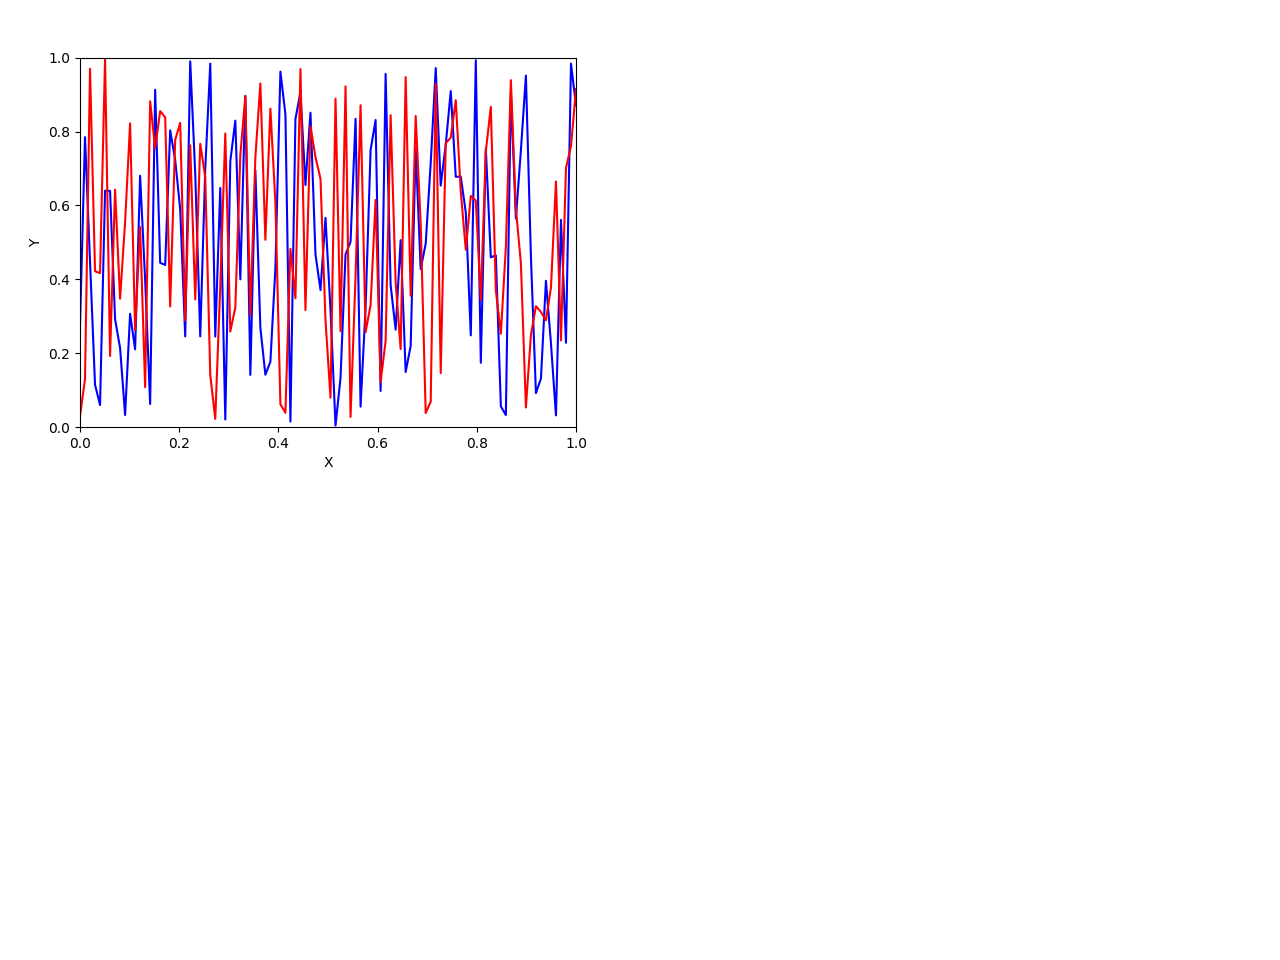

KeyboardInterrupt: 

In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()
counter={}
while True:
    i=0
    date=time.strftime("%Y%m%d")
    start=time.mktime(time.strptime(date,"%Y%m%d"))*1000
    end=time.time()*1000
    data=mdb.order_waimai.find({
        'createdAt':{'$gte':start,'$lt':end},
        'appCode':'bestpay',
        'timeline_new.status':'已支付'})
    counter.setdefault('{}'.format(i),0)
    counter['{}'.format(i)]+=data.count()
    i+=1
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set
    for f in range(5):
        pltsin(ax, ['b', 'r'])
        time.sleep(1)